# Social Network Analysis - Exercise Sheet 3b


### Small World Networks

Small-world networks were introduced by Duncan Watts and Steven Strogatz in a paper in *Nature* in 1998. 
They are linked to the small world phenomenon, that describes the property of social networks to have small average path lengths. Additionally Watts and Strogatz observed that there are networks where the neighborhood of every node is densly connected, a property that random networks usually do not exhibit.
In their paper they investigated this phenomenon and coined the term small-world networks.
The paper is supplied together with the jupyter notebook.

---

Given a Graph $(V,E)$ the **average shortest path** ($ASP$) in a Graph is defined by $ASP := \sum_{u,v\in V}\frac{d(u,v)}{|V|(|V|-1)}$ where $d(u,v)$ is the shortest path from $u$ to $v$.

The **local clustering coefficient** of a node in an undirected graph $C_i$ for $i\in V$ is defined by the ratio of edges in the neighborhood of $i$ compared to the number of possible edges, i.e., $C_i := \frac{2|\{e_{jk}: v_j,v_k \in N_i, e_{jk} \in E\}|}{|N_i|(|N_i|-1)}$ where $N_i$ is the neighborhood of the node $i$. 

Remark: $|N_i|(|N_i|-1)/2$ is the number of edges in a fully connected neighborhood, i.e., if the neighborhood would form a complete subgraph.

The **average local clustering coefficient** ($ALCC$) is defined as the average over all local clustering coefficients, i.e., $ ALCC := \frac{1}{|V|}\sum_{i=1}^{|V|} C_i$.

The definition of a small world network is as follows:

A network is called a **small-world network** if its average shortest path ($ASP$) is small and after the networks edges have pairwise been randomized (typically around $100\cdot |E|$ times) the $ASP$ remains nearly unchanged but the average local clustering coefficient ($ALCC$) breakes down, i.e., $$ASP_{actual} \approx APS_{randomized}$$ and $$ALCC_{actual} \gg ALCC_{randomized}.$$

Remark: For small-world social networks an $ASP\leq 4$ and an $ALCC\geq 70\%$ are common, for other networks, e.g., the ones mentioned in the paper, smaller $ALCC$ values and larger $ASP$ values are also normal. The important part is the breaking down of the $ALCC$ when comparing to a randomized network.


#### Edge Randomization

The **edge randomization** should choose two edges uniformly at random from the edge set and swap nodes, e.g., edges $(a,b)$ and $(c,d)$ swap nodes and become $(a,d)$ and $(c,b)$. The method should keep the node degrees intact.
To achive this it must be checked whether the edges have common nodes and whether the edges that would be generated through swapping already exist.


In [57]:
# Execute this cell to show the PDF containing the paper or open the PDF seperately
from IPython.display import IFrame
#IFrame("./texts/Watts_Strogatz_small-world-networks.pdf", width='100%', height=800)

In [58]:
# Execute this cell to show the PDF containing the algorithm or open the PDF seperately
from IPython.display import IFrame
#IFrame("./texts/Floyd_Warshall_undirected.pdf", width='100%', height=600)

##### Exercise
1. Implement an algorithm to compute the ASP. As an intermediate step implement the Floyd-Warshall algorithm for undirected graphs (see above) to compute all shortest paths.
2. Implement an algorithm to compute the ALCC.
3. Implement the edge randomization as presented above.
4. Analyze the given Networks with regard to the small world property and write a short report containing the computations and the conclusions you draw. Since this is a Jupyter Notebook, simply use different Cells for the Text and Code parts in the Report section below.


##### Hints
* Submit your code zipped via [moodle](https://moodle.uni-kassel.de/course/view.php?id=11038) until 15.12.2023 23:55 MEZ
* You can use the [NetworkX](https://networkx.github.io/documentation/stable/) library.
* Below the Implementation section is a Test section that can be used to check your code.

### Implementation
Implement your solution in this section.
Use the predefined methods.
You can add more methods if you want.

In [59]:
import random as rd
import networkx as nx
import matplotlib.pyplot as plt
import collections
import numpy as np

"""own methods"""
def local_clustering_coefficient(G, i: int):
    '''
    :param G: networkx graph
    :param i: node i
    :return: local clustering coefficient of node i

    Calculates the local clustering coefficient of a node i in a graph G
    '''
    
    neighbors = list(G.neighbors(i))
    induced_subgraph = G.subgraph(neighbors)
    return 2 * induced_subgraph.size() / (len(neighbors) * (len(neighbors) - 1))
    

"""predefined methods"""
def floyd_warshall(G):
    
    dist = np.ones((len(G.nodes), len(G.nodes))) * np.inf
    for i in range(len(G.nodes)):
        dist[i,i] = 0
    for edge in G.edges:
        dist[edge[0] - 1, edge[1] - 1] = 1
        dist[edge[1] - 1, edge[0] - 1] = 1

    for u in range(len(G.nodes)):
        for v in range(len(G.nodes)):
            for w in range(len(G.nodes)):
                dist[v,w] = min(dist[v,w], dist[v,u] + dist[u,w])
    return dist

def average_shortest_path(G):
    
    ASP = np.sum(floyd_warshall(G)) / (len(G.nodes) * (len(G.nodes) - 1))
    
    return ASP

def average_local_clustering_coefficient(G):
    
    ALCC = np.mean([local_clustering_coefficient(G, i) for i in G.nodes])
    return ALCC

def randomize_edges(G, n=100):
    
    # TODO
    
    return

### Tests 
This section contains testcases that can be used to test if the implemented methods work correctly.
Further it contains code to draw the graphs and inspect them visually given the NetworkX library was used.

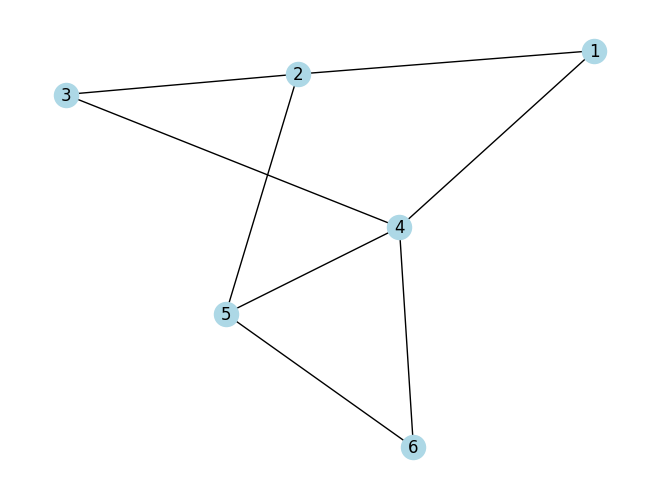

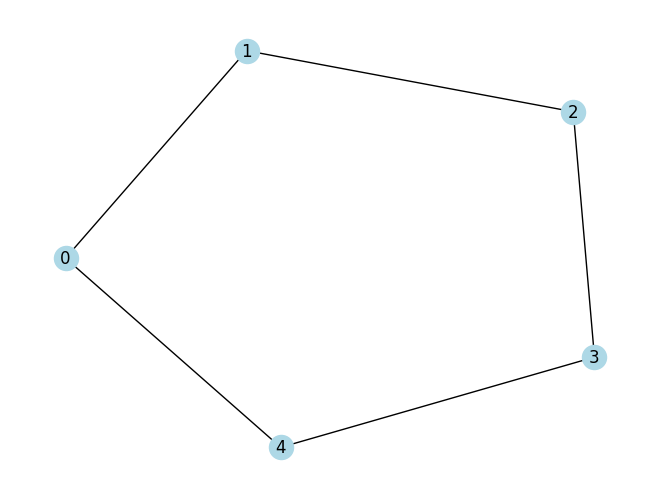

Todo está bien 😃


In [60]:
# Testcase 1
G = nx.Graph([[1,2],[2,3],[2,3],[2,5],[3,4],[1,4],[4,5],[4,6],[5,6]])
assert(abs(1.46666666-average_shortest_path(G))<0.001)
assert(abs(0.25-average_local_clustering_coefficient(G))<0.001)
degree_sequence = sorted([v for n,v in nx.degree(G)],reverse=True)
randomize_edges(G,100*len(G.edges()))
degree_sequence_after_random = sorted([v for n,v in nx.degree(G)],reverse=True)
assert(degree_sequence == degree_sequence_after_random)
nx.draw(G,with_labels = True, node_color='lightblue')
plt.show()

# Testcase 2
G = nx.read_adjlist("./graphs/five_circle_testgraph.adjlist",nodetype=int)
assert(abs(1.5-average_shortest_path(G))<0.001)
assert(abs(0-average_local_clustering_coefficient(G))<0.001)
degree_sequence = sorted([v for n,v in nx.degree(G)],reverse=True)
randomize_edges(G,100*len(G.edges()))
degree_sequence_after_random = sorted([v for n,v in nx.degree(G)],reverse=True)
assert(degree_sequence == degree_sequence_after_random)
nx.draw(G,with_labels = True, node_color='lightblue')
plt.show()

# Testcase 3
G = nx.read_adjlist("./graphs/testgraph.adjlist",nodetype=int)
assert(abs(2.8783-average_shortest_path(G))<0.001)
assert(abs(0.45019-average_local_clustering_coefficient(G))<0.001)
degree_sequence = sorted([v for n,v in nx.degree(G)],reverse=True)
randomize_edges(G,100*len(G.edges()))
degree_sequence_after_random = sorted([v for n,v in nx.degree(G)],reverse=True)
assert(degree_sequence == degree_sequence_after_random)

print('Todo está bien \U0001f603')

### Report

Analyze the given Networks with regard to the the small world property and write a short report containing the computations and the conclusions you draw. Since this is a Jupyter Notebook, simply use different Cells for the Text and Code parts.

The Report should contain basic information about the networks, e.g., number of nodes, and answer the question whether or not the network fits the definition of small world networks.


The networks are:


* **David Copperfield**
    * This is the undirected network of common noun and adjective adjacencies for the novel "David Copperfield" by English 19th century writer Charles Dickens. A node represents either a noun or an adjective. An edge connects two words that occur in adjacent positions. The network is not bipartite, i.e., there are edges connecting adjectives with adjectives, nouns with nouns and adjectives with nouns.

* **Jazz musicians**
    * This is the collaboration network between Jazz musicians. Each node is a Jazz musician and an edge denotes that two musicians have played together in a band. The data was collected in 2003.
    
* **Zachary karate club**
    * This is the well-known and much-used Zachary karate club network. The data was collected from the members of a university karate club by Wayne Zachary in 1977. Each node represents a member of the club, and each edge represents a tie between two members of the club. The network is undirected. An often discussed problem using this dataset is to find the two groups of people into which the karate club split after an argument between two teachers.

#### David Copperfield

In [61]:
G1 = nx.read_gml('./graphs/adjnoun.gml', label='id')


#### Jazz musicians

In [62]:
G2 = nx.read_adjlist("./graphs/out.arenas-jazz", comments='%',nodetype=int)


#### Zachary karate club

In [63]:
G3 = nx.read_adjlist("./graphs/out.ucidata-zachary", comments='%',nodetype=int)
